<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/03_data_science_modules/03_winter_temperature_enso.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Work-along: El Nino and IN Winter Temperatures

This notebook examines the relationship between winter minimum temperatures in southern central IN and El Nino.

**Goal:** examine the relationship between El Nino and minimum winter (Dec-Jan-Feb) temperatures in Bloomington, IN

<div style="max-width:720px"><div style="position:relative;padding-bottom:56.25%"><iframe id="kaltura_player" src='https://cdnapisec.kaltura.com/p/1751071/embedPlaykitJs/uiconf_id/55382703?iframeembed=true&amp;entry_id=1_sovpwyf8&amp;config%5Bprovider%5D=%7B%22widgetId%22%3A%221_hcj1au9f%22%7D&amp;config%5Bplayback%5D=%7B%22startTime%22%3A0%7D'  allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-downloads allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" title="EAS-G 690 - Week 3 - ENSO and Tmin" style="position:absolute;top:0;left:0;width:100%;height:100%;border:0"></iframe></div></div>

```{note}
Click [here](https://iu.mediaspace.kaltura.com/media/t/1_sovpwyf8) if the above video has issues playing.
```

**Method:**

 * obtain minimum temperature data from [NOAA NClimDiv](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00005), using the *NCEI Direct Download* method
 * read the dataset using `pandas`, filter out data for southern central Indiana
 * convert the data to timeseries format
 * obtain the [ENSO longitude index](https://cascade.lbl.gov/enso-longitude-index-eli/) Excel file and read with `pandas`; convert to timeseries format
 * make the ENSO and NClimDiv timeseries align (same start and end dates, same period - DJF, etc)
 * plot both timeseries
 * plot a scatter plot
 * do linear regression and correlation analyses

For this solution notebook, I will be using data directly from NOAA instead of downloading it, since `pandas` has the ability to open data from a URL.

## Part 1: Getting the NClimDiv data (workalong)

```{attention}
Download this notebook and place it in your course folder, running it in Visual Studio Code (not Google Colab).  You'll commit this to your git repository at the end.
```

In [1]:
""" Import libraries """
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import openpyxl

Downloaded /Users/barrettgibbs/Desktop/easg_Data_Analysis/lesson03/climdiv-norm-tmindv-v1.0.0-20250905 from https://www.ncei.noaa.gov/pub/data/cirs/climdiv/on 9/18/2025 at 7:17 pm Eastern; also downloaded the relevant readme `divisional-readme.txt`. 

In [2]:
""" Read the tmin data file. """

# set the file path
tmin_file_path = "climdiv-tmindv-v1.0.0-20250905"

# read the file with pandas using colum specifications from `divisional-readme.txt`
tmin_file_pd = pd.read_fwf(tmin_file_path,
                           delim_whitespace=True,
                            header=None,
                            )

# show the content
tmin_file_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,101281895,27.5,21.8,37.4,47.8,54.7,63.5,66.5,65.9,63.1,37.9,37.4,30.6
1,101281896,30.3,32.6,36.6,52.2,61.1,63.6,68.7,67.1,57.2,44.8,40.1,31.2
2,101281897,26.8,37.4,45.1,47.0,52.4,64.7,68.0,65.2,59.0,48.8,36.5,32.9
3,101281898,34.7,31.0,45.1,42.7,57.4,66.0,68.5,67.1,63.0,47.0,34.5,28.0
4,101281899,28.8,22.2,38.8,47.8,61.2,65.1,66.9,68.3,56.8,50.7,40.3,28.9


In [3]:
""" Filter out south central Indiana. """

#extract colum 0 which has the format SSDDCCYYYY
# where SS is the state
# DD is the division
# CC is the variable code
# YYYY is the year
column_0 = tmin_file_pd[0].astype(str)

# find rows with state code 12 (Indiana) and division code 8 (south central) in colum 0
indiana_south_central = column_0.str.contains('^1208')

# select those rows from the pandas object
filtered_tmin_file_pd = tmin_file_pd[indiana_south_central]

#show the content
filtered_tmin_file_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
10873,1208281895,14.5,11.1,28.5,42.8,50.1,61.6,61.8,62.1,56.9,33.6,31.6,25.8
10874,1208281896,22.8,23.5,26.5,47.8,56.6,59.7,64.9,62.1,52.8,37.7,34.4,27.0
10875,1208281897,17.8,25.4,33.3,40.8,45.1,58.4,65.6,60.3,53.6,45.3,32.6,25.8
10876,1208281898,26.0,23.8,36.2,38.8,53.1,61.5,64.9,63.9,58.8,45.0,28.8,20.6
10877,1208281899,20.7,12.7,29.4,43.9,55.1,62.8,63.0,64.4,53.1,46.5,36.1,21.4


/var/folders/_n/p058473n5mz_bssbwfdc1wtm0000gn/T/ipykernel_20382/3175180453.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_vector = pd.date_range(start='1895-01-01', end='2025-12-31', freq='M')


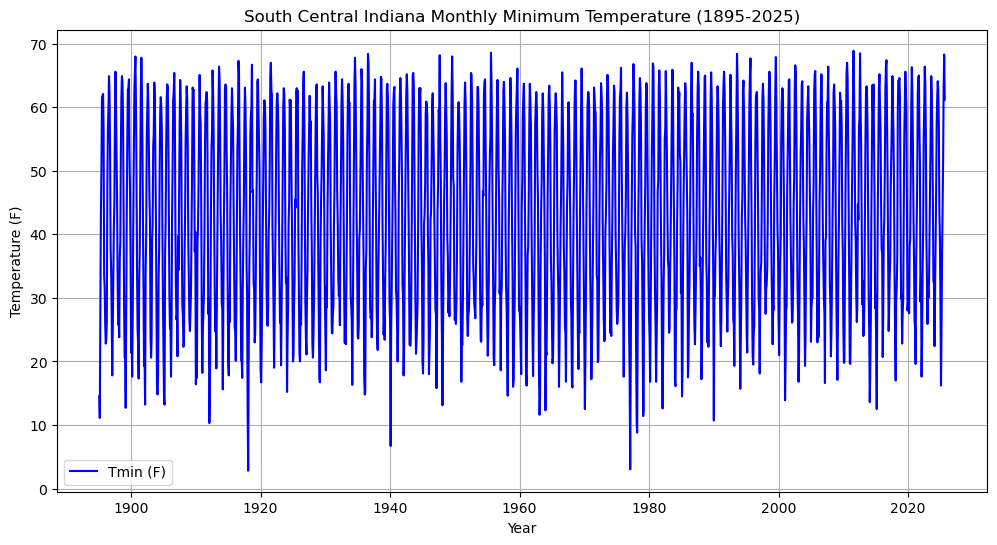

In [4]:
""" Convert the dataset to a timeseries. """

# extract the temperature values (colums 1 through 12) as a numpy array
#(rows are year)
tmin_values = filtered_tmin_file_pd.iloc[:, 1:13].to_numpy()

#ravel the temperature values to create a timeseries
tmin_timeseries = tmin_values.ravel()

#deal with missing values (these are coded as 99.90)
missing_value = 99.90
tmin_timeseries = np.where(tmin_timeseries == missing_value, np.nan, tmin_timeseries)


# create a coresponding time vector from Jan 1895 through Dec 2025
time_vector = pd.date_range(start='1895-01-01', end='2025-12-31', freq='M') 

# plot the values
plt.figure(figsize=(12, 6))
plt.plot(time_vector, tmin_timeseries, label="Tmin (F)", color="blue")
plt.title('South Central Indiana Monthly Minimum Temperature (1895-2025)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.grid()
plt.legend()
plt.show()



/var/folders/_n/p058473n5mz_bssbwfdc1wtm0000gn/T/ipykernel_20382/3801179105.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tmin_djf = pd.Series(tmin_djf, index=time_vector_djf).resample('Y').mean()


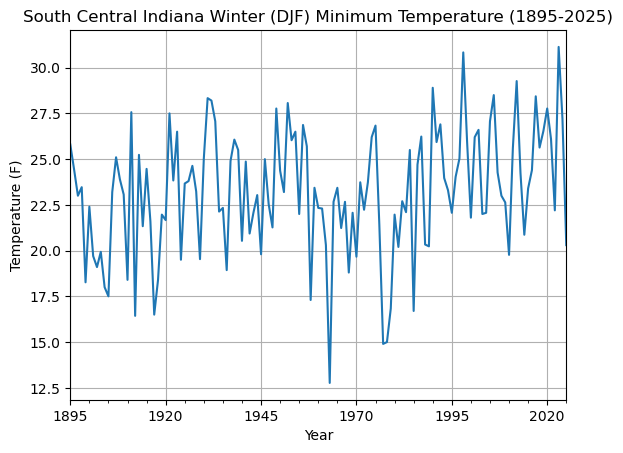

In [5]:
""" Select and average over winter times (DJF). """

# find dates that are in December, January, and February
in_djf = time_vector.month.isin([12, 1, 2])

# remove the first two values
tmin_djf = tmin_timeseries[in_djf][2:]
time_vector_djf = time_vector[in_djf][2:]


# group by year (dealing with the fact that December will have a different year, and deal with NaNs)
tmin_djf = pd.Series(tmin_djf, index=time_vector_djf).resample('Y').mean()

tmin_djf.head()

# plot the timeseries
tmin_djf.plot()

#label axes
plt.title('South Central Indiana Winter (DJF) Minimum Temperature (1895-2025)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()  


## Part 2: Reading and opening El Nino data

```{attention}
Work in groups on your own from this point forward.
```

Available sheets: ['ELI_ERSSTv5_1854.01-2020.02', 'README']


/var/folders/_n/p058473n5mz_bssbwfdc1wtm0000gn/T/ipykernel_20382/2234319850.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_vector_eli = pd.date_range(start='1854-01-01', end='2020-02-01', freq='M')


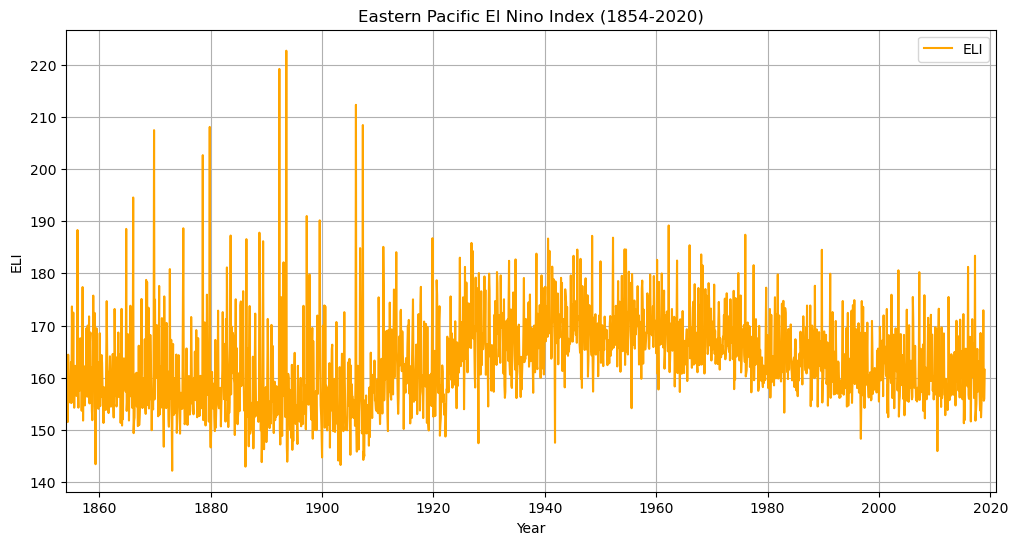

In [6]:
# set the URL to the ELI file
eli_url = "https://portal.nersc.gov/archive/home/projects/cascade/www/ELI/ELI_ERSSTv5_1854.01-2020.05.xlsx"


# Check available sheet names
with pd.ExcelFile(eli_url) as xls:
	print("Available sheets:", xls.sheet_names)
	# Use the correct sheet name (for example, the first one)
	eli_pd = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# read in the data 'ELI_ERSSTv5_1854.01-2020.02'
eli_pd = pd.read_excel(eli_url, sheet_name='ELI_ERSSTv5_1854.01-2020.02')
# show the content
eli_pd.head()
# extract the ELI values (colums 1 through 166) as a numpy array
#(rows are year)
eli_values = eli_pd.iloc[:, 1:166].to_numpy()

#create a timeseries of all the ELI values from 1854 to 2020
eli_timeseries = eli_values.ravel()

#deal with missing values (these are coded as 99.90)
missing_value = 99.90
eli_timeseries = np.where(eli_timeseries == missing_value, np.nan, eli_timeseries)

# create a coresponding time vector from Jan 1854 through Feb 2020
time_vector_eli = pd.date_range(start='1854-01-01', end='2020-02-01', freq='M')

# plot the values
plt.figure(figsize=(12, 6))
plt.plot(time_vector_eli[:len(eli_timeseries)], eli_timeseries, label="ELI", color="orange")

#set range of plot
plt.xlim(pd.Timestamp('1854-01-01'), pd.Timestamp('2020-12-31'))

plt.title('Eastern Pacific El Nino Index (1854-2020)')
plt.xlabel('Year')
plt.ylabel('ELI')
plt.grid()
plt.legend()
plt.show()



hint: use the `merge()` method in pandas to get the ELI and NOAA data to align.

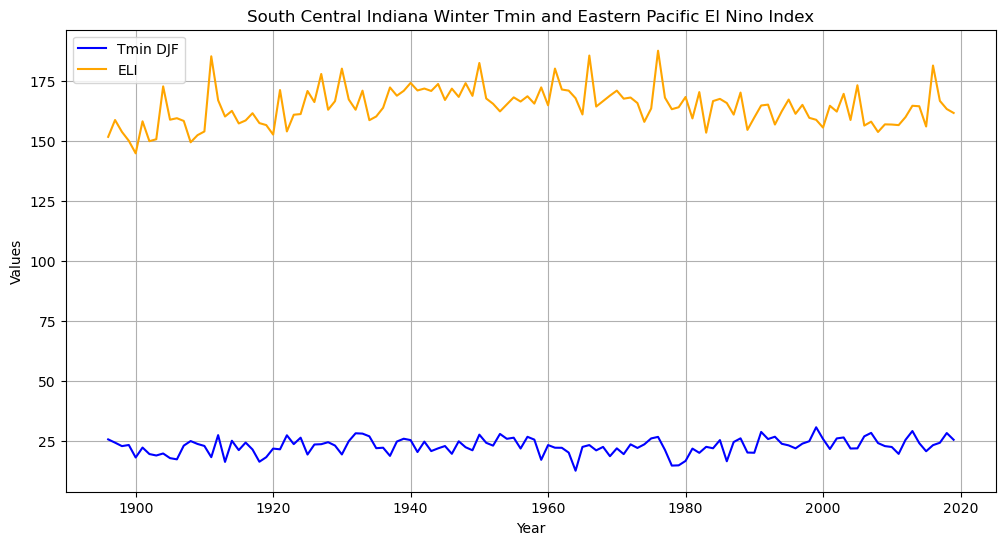

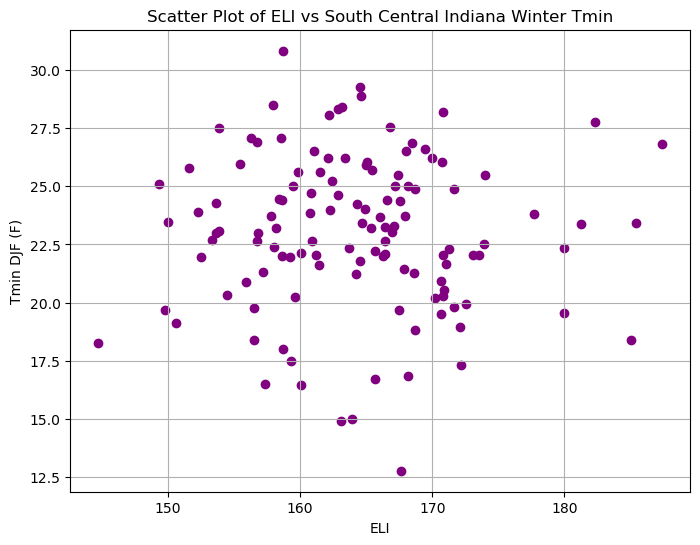

Text(0.5, 0, 'ELI')

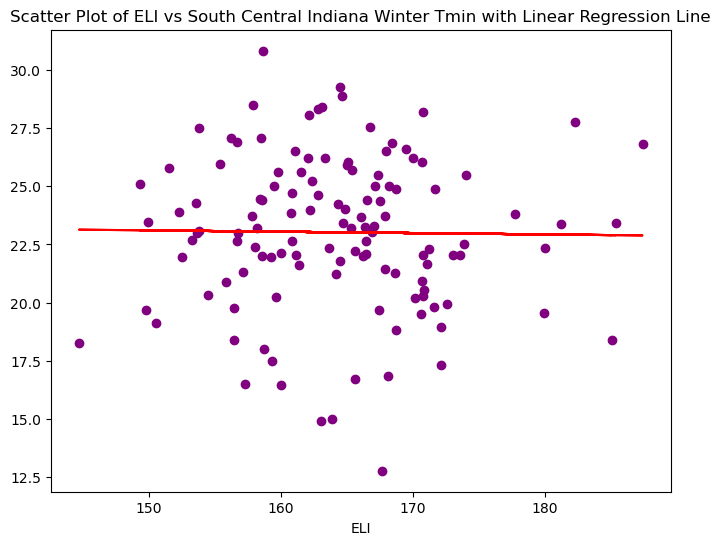

In [7]:
# merge the two datasets using the merge() function in pandas
# first, convert the tmin_djf series to a dataframe and reset the index
tmin_djf_df = tmin_djf.reset_index()
tmin_djf_df.columns = ['Date', 'Tmin_DJF']


# merge the two dataframes on the Date column
merged_df = pd.merge(tmin_djf_df, pd.DataFrame({'Date': time_vector_eli[:len(eli_timeseries)], 'ELI': eli_timeseries}), on='Date', how='inner')
merged_df.head()


# plot the two timeseries together
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Tmin_DJF'], label='Tmin DJF', color='blue')
plt.plot(merged_df['Date'], merged_df['ELI'], label='ELI', color='orange')
plt.title('South Central Indiana Winter Tmin and Eastern Pacific El Nino Index')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()  

#produce a scatter plot of the two variables
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['ELI'], merged_df['Tmin_DJF'], color='purple')
plt.title('Scatter Plot of ELI vs South Central Indiana Winter Tmin')
plt.xlabel('ELI')
plt.ylabel('Tmin DJF (F)')
plt.grid()
plt.show()

#plot a linear regression line on the scatter plot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(merged_df['ELI'], merged_df['Tmin_DJF'])
line = slope * merged_df['ELI'] + intercept
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['ELI'], merged_df['Tmin_DJF'], color='purple', label='Data points')
plt.plot(merged_df['ELI'], line, color='red', label='Fit line')
plt.title('Scatter Plot of ELI vs South Central Indiana Winter Tmin with Linear Regression Line')
plt.xlabel('ELI')